# Laboratorio 4 (Trabajo final, parte uno)

Bienvenido al tercer laboratorio del curso Análisis de Datos en Python. 

Escribe el código correspondiente para contestar cada una de las preguntas. Fíjate muy bien en el nombre de las variables, ya que de lo contrario, tu trabajo no podrá ser evaluado de manera correcta. 

Debes ir ejecutando las celdas de codigo en el orden que aparecen, para evitar tener errores. 

El laboratorio consta de dos partes: la primera, que realizarás en este jupyter notebook y la segunda, que se encuentra en el recurso llamado "Trabajo final (parte 2)"

In [1]:
## Primero importamos las librerias y los datos que utilizaremos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones data')
ratings = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones ratings')
users = pd.read_excel('Tarea 4.xlsx', sheet_name = 'cellphones users') 

In [2]:
data

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,2022-03-18
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,2021-09-24
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,2021-09-24
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,2018-10-26
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,2021-05-12
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,2022-03-23
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,2021-01-22
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,2022-03-24


In [9]:
filtered_data = data[(data['price'] <= 150)]

In [3]:
ratings

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


In [4]:
users

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker
...,...,...,...,...
94,254,25,Female,software developer
95,255,25,Male,software developer
96,256,49,Male,Information Technology
97,257,25,Female,Manager


### Pregunta 1

Utilice el método de agrupación “K-Means” y construya 3 agrupaciones de celulares, considerando los siguientes atributos 

`['internal memory','RAM','performance','main camera','selfie camera','battery size']`

¿Qué puede decir sobre los precios de venta de los celulares de cada grupo?

Para responder a lo anterior, construye un dataframe que contega los 3 clusters y para cada grupo obtenga el precio promedio, la desviación estandar del precio, precio mínimo y precio máximo.

**MUY IMPORTANTE**
* NO debes aproximar ni redondear ningún valor
* Utilizar la función `preprocessing.MinMaxScaler()` para estandarizar datos.
* Usa la función `KMeans` con `random_state=42`. Los datos que entregas a esta función deben estar estandarizados, según el punto anterior. 

Debes crear una tabla de la forma:


|   | Grupo k means | Precio promedio | Desv est precio | Precio mínimo | Precio máximo |
|---|---|---|---|---|---|
|0 | 0  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |
|1 | 1  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |
|2 | 2  | XXXXX  |  XXXXX  |  XXXXX  |  XXXXX  |

Utiliza los mismos nombres para los Headers: Grupo k means, Precio promedio, Desv est precio, Precio mínimo, Precio máximo. Es importante que respetes las mayúsculas de dichos nombres tal cual son señalados.
Debe guardarse en la variable 'data_grupos'

In [66]:
data_grupos=None

columnas = ['internal memory','RAM','performance','main camera','selfie camera','battery size']
data_seleccionada= data[columnas]
scaler = MinMaxScaler()
data_escalada= scaler.fit_transform(data_seleccionada)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Grupo k means'] = kmeans.fit_predict(data_escalada)
grupos = data.groupby('Grupo k means')['price'].agg(['mean', 'std', 'min', 'max']).reset_index()
grupos.columns = ['Grupo k means', 'Precio promedio', 'Desv est precio', 'Precio mínimo', 'Precio máximo']
data_grupos = grupos
data_grupos



,Grupo k means,Precio promedio,Desv est precio,Precio mínimo,Precio máximo
0,0,225.375000,122.057290,129,500
1,1,642.571429,212.874725,312,987
2,2,903.090909,565.528683,236,1998


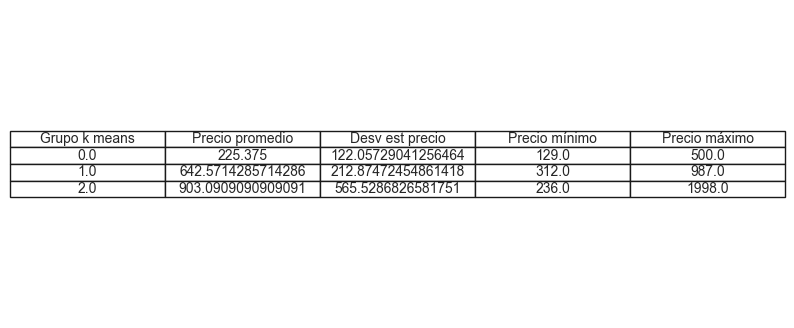

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que data_grupos ya está definido
fig, ax = plt.subplots(figsize=(10, 4))  # Ajusta el tamaño de la figura según tus necesidades
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data_grupos.values, colLabels=data_grupos.columns, cellLoc='center', loc='center')

# Ajusta el tamaño de la fuente
table.auto_set_font_size(False)
table.set_fontsize(10)

# Guarda la imagen
plt.savefig("data_grupos.png", bbox_inches='tight')
plt.show()


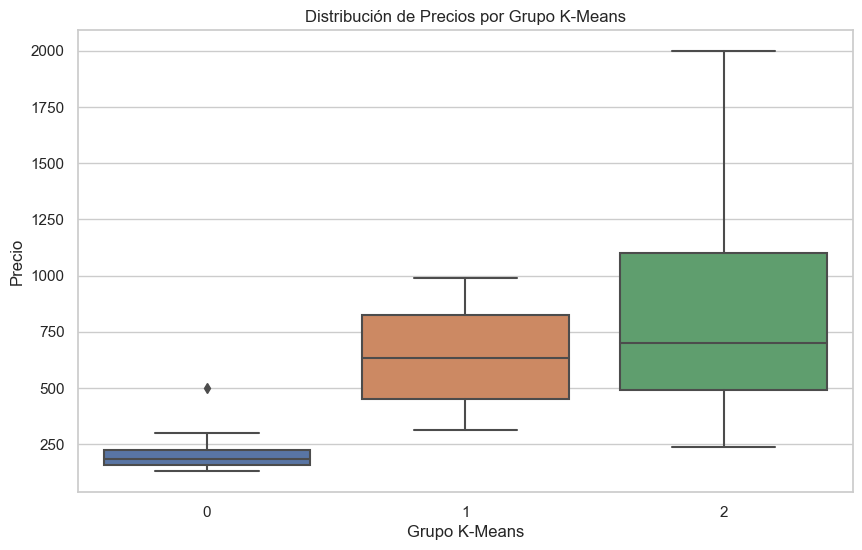

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo k means', y='price', data=data)
plt.title('Distribución de Precios por Grupo K-Means')
plt.xlabel('Grupo K-Means')
plt.ylabel('Precio')
plt.show()


Haremos un test visible para ver si estamos por buen camino, usaremos de ejemplo el primer grupo (Grupo 0). Tu tabla debe comenzar de la siguiente forma:

|   | Grupo k means | Precio promedio | Desv est precio | Precio mínimo | Precio máximo |
|---|---|---|---|---|---|
|0 | 0  | 225.375000 |  122.057290  |  129  |  500  |


In [52]:
# Revisión del primer cluster 

data_cluster_0 = data_grupos[data_grupos["Grupo k means"] == 0]

assert np.round(data_cluster_0["Precio promedio"].values,1) == 225.4, "Promedio del cluster 0 con errores"
assert np.round(data_cluster_0["Desv est precio"].values, 1) == 122.1, "Desviación estandar del cluster 0 con errores"

assert np.round(data_cluster_0["Precio mínimo"].values, 1) == 129.0, "Mínimo del cluster 0 con errores"
assert np.round(data_cluster_0["Precio máximo"].values, 1) == 500, "Máximo del cluster 0 con errores"


Ahora haremos el test real, no debes modificar ni escribir nada en la siguiente celda, solo debes ejecutarla.

### Pregunta 2
Calcule la correlación (bivariada) entre el precio y todas las variables cuantitativas con información sobre los celulares. ¿Cuáles son las 3 variables que presentan una mayor correlación con el precio?
Para responder a la pregunta, debes completar las variables variable_1, variable_2 y variable_3 con las 3 variables que poseen mayor correlacion, siendo variable_1 la que mayor correlación posee, variable_2, la segunda mayor y variable_3 la tercera mayor.

Ejemplo: si la variable 'main camera' fuera la variable con mayor correlación. Entonces deben dejar
variable_1 = 'main camera', si la segunda mayor fuera 'RAM' entonces variable_2 = 'RAM' (deben respetar el nombre con sus espacios y mayúsculas)

NOTA: Deben generar las correlaciones de la forma que más cómodos se sientan, no tendrán puntaje aquellos que completan las variables sin entregar un respaldo con las correlaciones calculadas.

In [14]:
data

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,Grupo k means
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,2022-03-18,2
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,2021-09-24,2
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24,2
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,2021-09-24,2
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24,2
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,2018-10-26,2
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,2021-05-12,1
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,2022-03-23,0
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,2021-01-22,0
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,2022-03-24,1


In [69]:
variable_1=None
variable_2=None
variable_3=None

variables_cuantitativas = ['internal memory', 'RAM', 'performance', 'main camera', 'selfie camera', 'battery size', 'screen size', 'weight', 'price']
data_cuantitativas = data[variables_cuantitativas]
correlacion = data_cuantitativas.corr()
correlaciones_precio = correlacion['price'].drop('price')
variables_mayor_correlacion = correlaciones_precio.abs().nlargest(3).index
variable_1 = variables_mayor_correlacion[0]
variable_2 = variables_mayor_correlacion[1]
variable_3 = variables_mayor_correlacion[2]

print(f"variable_1 = '{variable_1}'")
print(f"variable_2 = '{variable_2}'")
print(f"variable_3 = '{variable_3}'")
correlaciones_precio.sort_values(ascending=False)


variable_1 = 'internal memory'
variable_2 = 'RAM'
variable_3 = 'weight'


internal memory    0.834266
RAM                0.706235
weight             0.546797
performance        0.527611
screen size        0.316986
selfie camera      0.023828
battery size      -0.134425
main camera       -0.255498
Name: price, dtype: float64

Revisemos que los nombres de las variables hayan sido bien escritos, 

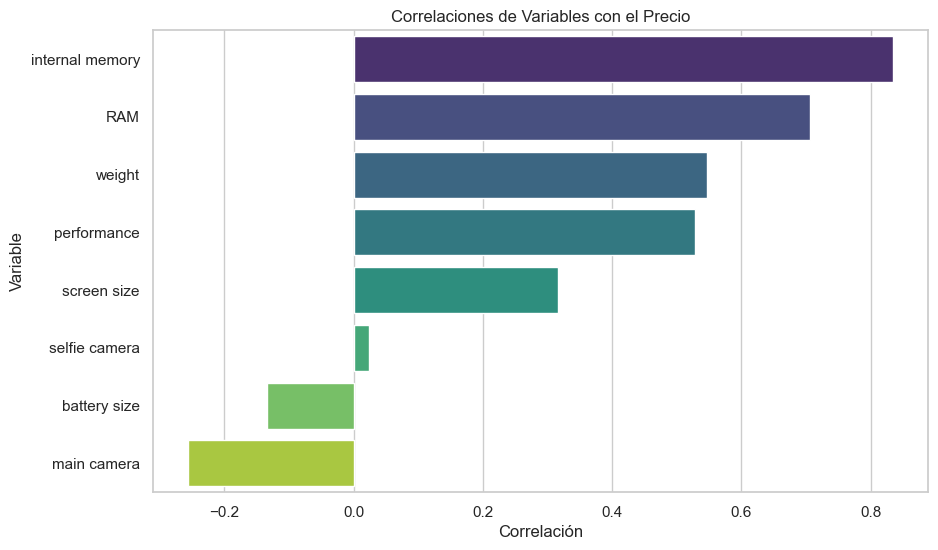

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar las correlaciones de mayor a menor
correlaciones_precio_ordenadas = correlaciones_precio.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlaciones_precio_ordenadas.values, y=correlaciones_precio_ordenadas.index, palette='viridis')
plt.title('Correlaciones de Variables con el Precio')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()


In [55]:
for v in [variable_1, variable_2, variable_3]:
    print(v in data.columns)

True
True
True


### Pregunta 3
Construya una regresión multivariada entre precio y las 3 variables determinadas en la parte (2). Utilice un 20% de los datos para testear y un random_state de 42. El entorno de este jupyter notebook permite el LinearRegression(normalize=True), así que úsenlo.
Una vez construido su modelo, debe almacenar la siguiente información:

    'coeficientes': para esto utilicen el comando .coef_ (nombredesumodelo.coef_) y lo almacenan directamente en la variable sin redondear ni aproximar nada.
    'intercepto': para esto utilicen el comando .intercept_ (nombredesumodelo.intercept_) y lo almacenan directamente en la variable sin redondear ni aproximar nada.
    'r2_score_final': también sin redondear ni aproximar nada.
    
Adicionalmente, genera una gráfica que contraste los valores reales con la predicción.



Coeficientes: [ 2.54915711 47.98974532  2.93456771]
Intercepto: -620.3725258672204
R2 Score: 0.13799778014146213


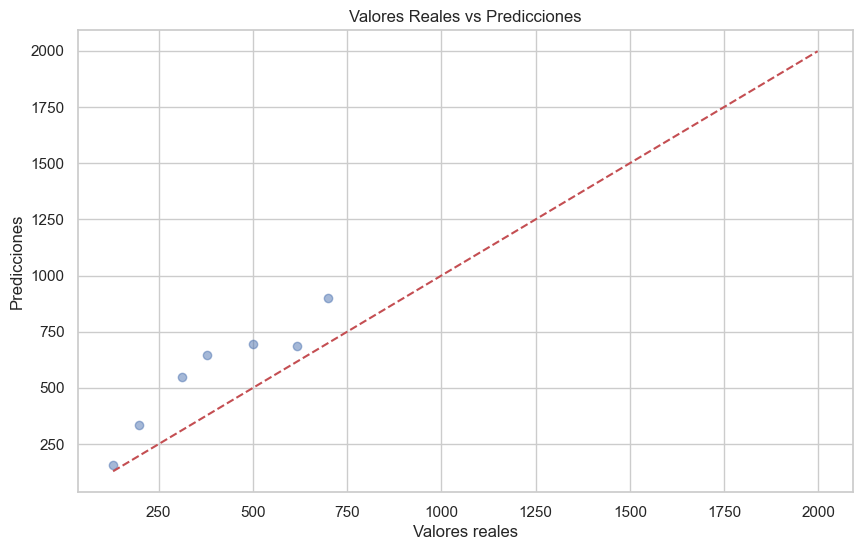

In [75]:
coeficientes=None
intercepto=None
r2_score_final=None

variables_seleccionadas = ['internal memory', 'RAM', 'weight']
X = data[variables_seleccionadas]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression(normalize=True)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2_score_final = r2_score(y_test, y_pred)
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")
print(f"R2 Score: {r2_score_final}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()



Coeficientes: [ 2.54915711 47.98974532  2.93456771]
Intercepto: -620.3725258672204
R2 Score: 0.13799778014146213


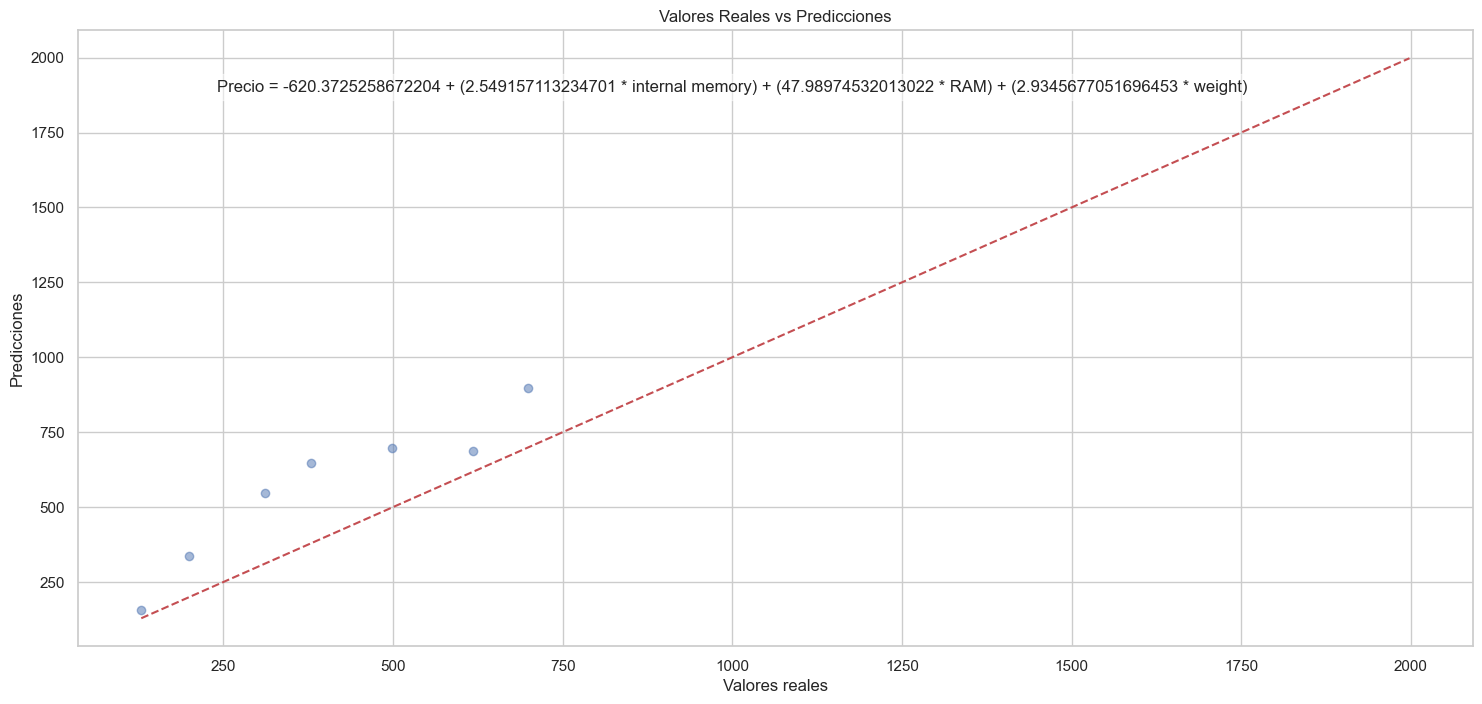

In [78]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Variables y datos
variables_seleccionadas = ['internal memory', 'RAM', 'weight']
X = data[variables_seleccionadas]
y = data['price']

# División de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
modelo = LinearRegression(normalize=True)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2_score_final = r2_score(y_test, y_pred)
coeficientes = modelo.coef_
intercepto = modelo.intercept_

print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")
print(f"R2 Score: {r2_score_final}")

# Gráfico de dispersión con la línea de predicción
plt.figure(figsize=(18, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

# Mostrar la ecuación de la recta en el gráfico
eq_text = f'Precio = {intercepto} '
for i, coef in enumerate(coeficientes):
    eq_text += f'+ ({coef} * {variables_seleccionadas[i]}) '

plt.text(0.1, 0.9, eq_text, fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


###  Pregunta 4

Construya una agrupación, utilizando K-Means, considerando ranking promedio (puesto por el comprador), edad y sexo. Escoja, con el método del codo, la cantidad de grupos. ¿Qué puede decir de las similitudes o diferencias intra e inter grupos?
Utilice el min_max_scaler para la estandarización de los datos y utilice un random_state de 42 en la creación de Kmeans.
Hint: para el método del códogo, haga un range hasta 15.

Para responder esta pregunta, complete la variable 'clusters' con el número de clusters que obtenga mediante el método del codo, si su resultado es 10, entonces 'clusters'=10. (como int).
Elija el segundo codo, el primero será muy notorio y evitende, pero el segundo será la opción correcta.

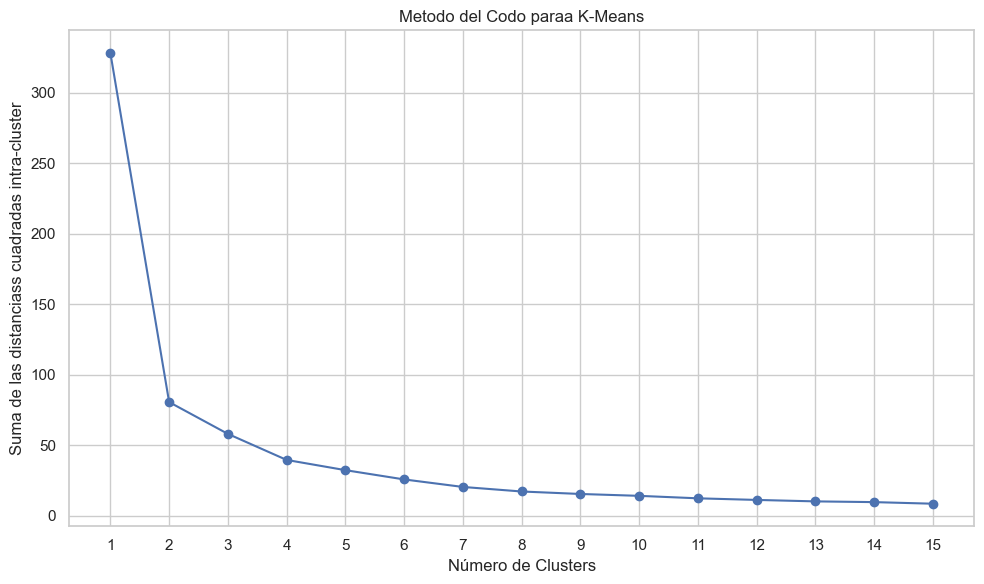

2

In [80]:
clusters=None

columnas_agrupacion = ['rating', 'age', 'gender']
data_agrupacion = ratings.merge(users, on='user_id')[columnas_agrupacion]
data_agrupacion['gender'] = data_agrupacion['gender'].astype('category').cat.codes
scaler = MinMaxScaler()
data_escalada = scaler.fit_transform(data_agrupacion)
distancias_cuadraticas = []
rangos_clusters = range(1, 16)  

for k in rangos_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_escalada)
    distancias_cuadraticas.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(rangos_clusters, distancias_cuadraticas, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de las distanciass cuadradas intra-cluster')
plt.title('Metodo del Codo paraa K-Means')
plt.xticks(rangos_clusters)
plt.grid(True)
plt.tight_layout()
plt.show()

diferencias = [distancias_cuadraticas[i] - distancias_cuadraticas[i + 1] for i in range(len(distancias_cuadraticas) - 1)]
segundo_codo_index = sorted(range(len(diferencias)), key=lambda i: diferencias[i], reverse=True)[1] + 1

clusters = segundo_codo_index
clusters  


In [61]:
# Revisemos que la variable haya quedado correctamente asignada a tu respuesta, 
print(clusters)

2


Ahora se procederá a evaluar los clusters obtenidos, no modifique ni altere la celda que está acontinuación, solo debe ejecutarla.

Ahora debe aplicar el método de kmeans con el número de clusters obtenido y graficarlos.
Ruerde utilizar la semilla de random_state=42

In [62]:
kmeans_p4 = KMeans(n_clusters=4, random_state=42).fit(df_escalado_p4)
centroids_p4 = kmeans_p4.cluster_centers_
centroids_p4

labels_p4 = kmeans_p4.predict(df_escalado_p4)
data_p4['label'] = labels_p4
data_p4['cellphone_id'] = id_cell

x = df_escalado_p4['rating'].values
y = df_escalado_p4['age'].values
z = df_escalado_p4['gender'].values

colores=['red','green','blue','orange']
asignar=[]
for row in labels_p4:
     asignar.append(colores[row])     
plt.rcParams["figure.figsize"] = (12,7)
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=asignar)
ax.scatter3D(centroids_p4[:, 0], centroids_p4[:, 1],centroids_p4[:, 2], marker = '*',c=['red','green','blue','orange'], 
            s=900)
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("Gender")
plt.title('Agrupación k-means puesto por el comprador')
plt.show()

NameError: name 'df_escalado_p4' is not defined